In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

churn_data = pd.read_csv('data/churn.csv')

In [2]:
churn_data.drop('RowNumber', axis=1, inplace= True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

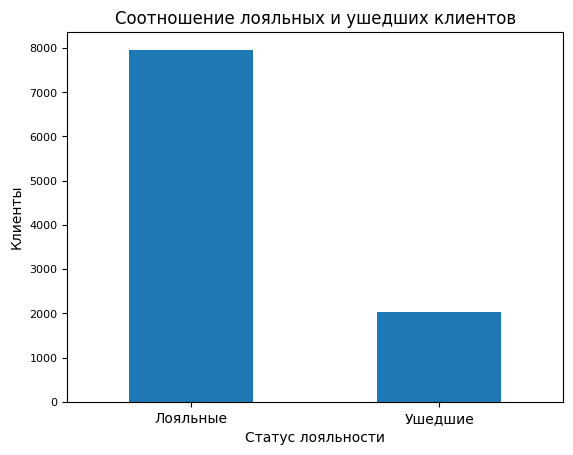

In [4]:
churn_data['Exited_Label'] = churn_data['Exited'].replace({1: 'Ушедшие', 0: 'Лояльные'})
count_exited = churn_data['Exited_Label'].value_counts()
count_exited.plot.bar()
plt.xlabel('Статус лояльности')
plt.ylabel('Клиенты')
plt.title('Соотношение лояльных и ушедших клиентов')
plt.yticks (fontsize = 8) 
plt.xticks (rotation = 360)   
plt.show()

Лояльных клиентов почти в 4 раза больше, чем ушедших

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

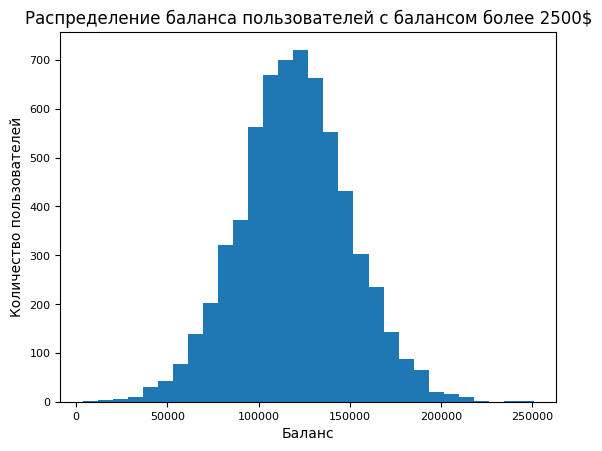

In [37]:
filtred_users = churn_data[churn_data['Balance'] > 2500]

plt.hist(filtred_users['Balance'], bins=30)
plt.xlabel('Баланс')
plt.ylabel('Количество пользователей')
plt.title('Распределение баланса пользователей с балансом более 2500$')
plt.yticks (fontsize = 8)    
plt.xticks (fontsize = 8)    
plt.show()                     

Полученная гистрограмма говорит о нормальном распределении клиентов с балансом более 2500$. 
Основная масса клиентов имеет баланс от 100 до 150 тыс. долларов. Клиенты с балансом более 250 тыс. долларов отсутствуют, вероятно, процент по вкладам более 250 тыс. долларов не устраивает клиентов банка и они обращаются в банки с более выгодными условиями

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [38]:
fig = px.histogram(churn_data,
                   x='Balance',
                   nbins=20,
                   title='Распределение баланса клиентов по оттоку',
                   color="Exited_Label",
                   histnorm="percent",
                   color_discrete_sequence=['red', 'blue'],
                   opacity=0.6)
fig.update_xaxes(title_text='Баланс')
fig.update_yaxes(title_text='Клиенты')
fig.show()

Большинство ушедших клиентов имеют баланс от 100 до 150 тыс. долларов. Возможно, при накоплении от 100 тыс. клиенты ожидали получить от банка какие-то особые условия по своим вкладам, бонусы или скидки на услуги банка,  однако по каким-то причинам банк не смог удовлетворить их ожидания.

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

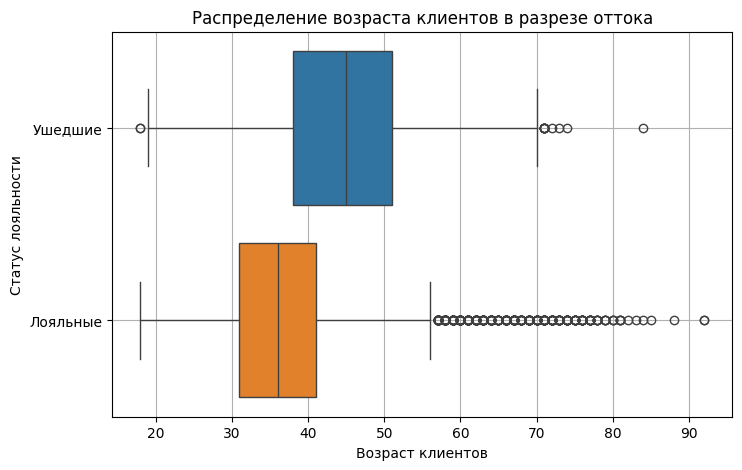

In [39]:
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited_Label',
    x='Age',
    orient='h',
    hue = 'Exited_Label'      
)
boxplot.set_title('Распределение возраста клиентов в разрезе оттока');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Статус лояльности');
boxplot.grid()

Большинство потенциальных выбросов приходится на лояльных клиентов старше 57 лет. Также наблюдаются потенциальные выбросы среди ушедших клиентов в возрасте 19 лет и старше 70 лет. Банку следует обратить внимание на возрастную категорию клиентов примерно от 39 лет до 51 года, основная масса ушедших клиентов относится к этой возрастной группе. Можно предположить, что их не устроили условия по ипотечному кредитованию, поскольку люди в возврасте старше 35 лет обычно имеют богатый опыт работы и стабильную зарплату, могут позволить себе ипотечное кредитование для улучшения жилищных условий.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

(array([300., 400., 500., 600., 700., 800., 900.]),
 [Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700'),
  Text(0, 800.0, '800'),
  Text(0, 900.0, '900')])

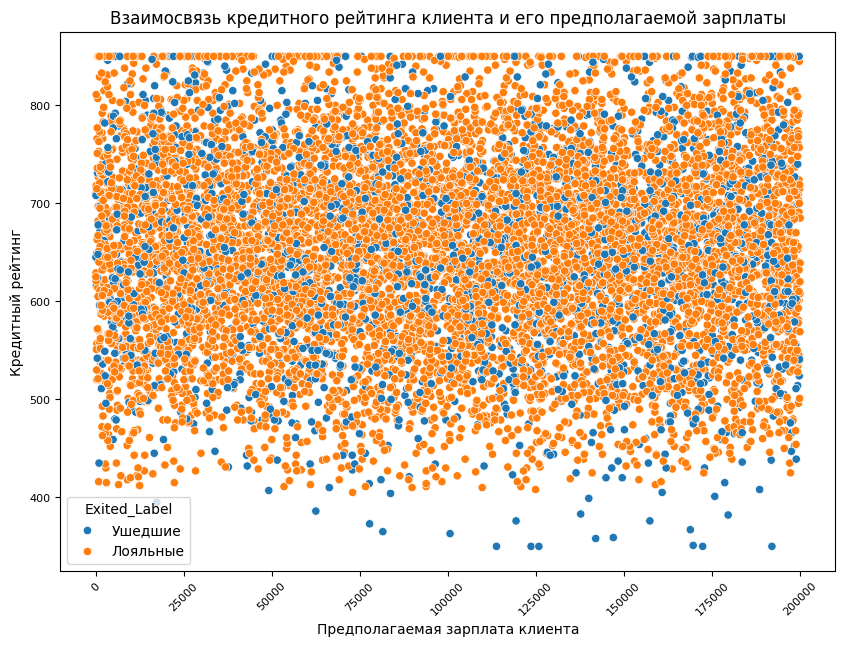

In [40]:
fig = plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited_Label'                 
)
scatterplot.set(title= 'Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', 
                xlabel= 'Предполагаемая зарплата клиента',
                ylabel= 'Кредитный рейтинг'
                                )
plt.xticks (rotation= 45, fontsize = 8)
plt.yticks (fontsize = 8)

Взаимосвязь между кредитным рейтингом и предполагаемой зарплатой не наблюдается. Размер предполагаемой зарплаты не влияет на кредитный рейтинг. Среди лояльных и ушедших клиентов высокий кредитный рейтинг имееют клиенты с разным уровнем предполагаемой зарплаты

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

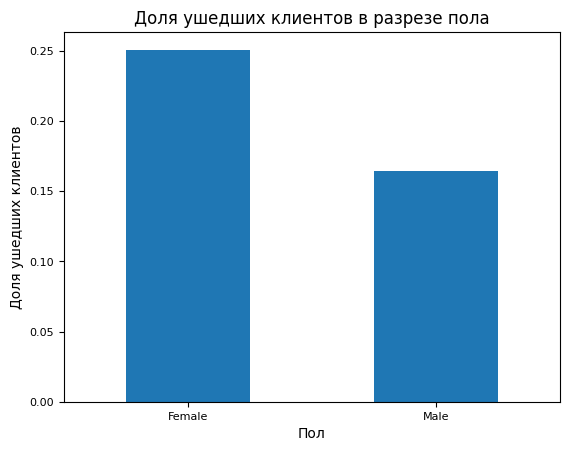

In [41]:
grouped_by_gender = churn_data.groupby(['Gender'])['Exited'].mean()

fig = grouped_by_gender.plot.bar(
    x= grouped_by_gender.index,
    y= 'Exited',
    title= 'Доля ушедших клиентов в разрезе пола',
    xlabel= 'Пол',
    ylabel= 'Доля ушедших клиентов'
   )
plt.yticks (fontsize= 8)
plt.xticks (rotation= 360, fontsize= 8)

Полученный график показывает, что клиенты-женщины чаще уходят из банка, чем клиенты-мужчины. 

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [42]:
df_services = churn_data.pivot_table(index='NumOfProducts', 
                                     columns='Exited_Label',
                                     values='CustomerId',
                                     aggfunc='count',
                                     fill_value = 0
                                     )

fig = px.bar(df_services,
             barmode='group',
             title='Зависимость оттока клиентов от числа приобретенных услуг',
             color_discrete_sequence=['blue', 'red'],
             opacity = 0.5,
             height=800
            )

fig.update_layout(xaxis_title='Количество приобретенных услуг', yaxis_title='Количество клиентов')
fig.show()

График показывает как меняется лояльность клиентов в зависимости от количества приобретенных услуг. При приобретении 2го  пакета услуг лояльность клиентов возрастает, однако при последующем приобретении 3го пакета лояльность падает, а после приобретения 4го клиенты уходят из банка. Возможно, ожидания клиентов после приобретения 3го пакета услуг на получение каких-то особых условий от банка как постоянным клиентам не оправдались,  они нашли более выгодные для себя условия в других банках.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [43]:
churn_data['IsActiveMember_Label'] = churn_data['IsActiveMember'].replace({1: 'Активные', 0: 'Неактивные'})

df_active= churn_data.pivot_table(
    'CustomerId',
    index='IsActiveMember_Label',
    columns='Exited_Label',
    aggfunc='count'
)

fig = px.bar(
    data_frame= df_active,
    width= 1000,
    height= 700,
    color='Exited_Label',
    barmode='group',
    title='  Влияние статуса активности клиента на отток клиентов'
)
fig.update_layout(
    xaxis_title='Статус активности',
    yaxis_title='Клиенты'
)
fig.show()

Судя по полученному графику можно сделать вывод, что активные клиенты уходят реже, чем неактивные. Банк может разработать для неактивных клиентов систему скидок и бонусов, чтобы побудить их активнее пользоваться своими услугами и повысить лояльность.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [44]:
df_countries_1 = churn_data.pivot_table( values='Exited', index='Geography', aggfunc= 'mean') 
fig = px.choropleth(
    data_frame= df_countries_1, 
    locations=df_countries_1.index, 
    locationmode = "country names", 
    color= 'Exited', 
    range_color=[0, 0.35], 
    title='Доля ушедших клиентов по странам', 
    width= 800,
    height= 500,
    color_continuous_scale='Reds'
    )
fig.show()

Наибольшая доля ушедших клиентов приходится на Германию. Возможно это связано с внесением изменений в законодательство в банковской и налоговой сферах,  изменение ставки рефинансирования.

9.10 Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Excellent'),
  Text(0, 1.5, 'Fair'),
  Text(0, 2.5, 'Good'),
  Text(0, 3.5, 'Poor'),
  Text(0, 4.5, 'Very_Poor')])

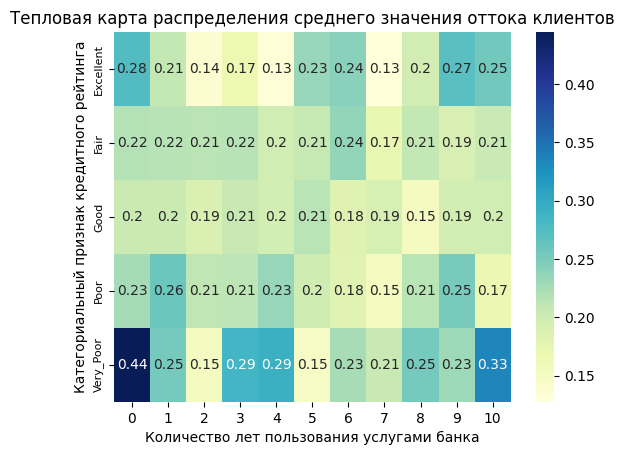

In [45]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data ['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot_cat = churn_data.pivot_table(
    index= 'CreditScoreCat',
    columns= 'Tenure',
    values= 'Exited',
    aggfunc= 'mean'    
)
    
heatmap = sns.heatmap(data=pivot_cat, cmap='YlGnBu', annot=True)
heatmap.set(title='Тепловая карта распределения среднего значения оттока клиентов')
heatmap.set_xlabel('Количество лет пользования услугами банка')
heatmap.set_ylabel('Категориальный признак кредитного рейтинга')
plt.yticks (fontsize = 8)

Тепловая карта показывает, что чаще всего уходят клиенты с самым низким кредитным рейтингом, которые пользуются услугами банка меньше года. Можно сделать вывод, что банку не выгодно работать с такими клиентами, им отказывают в кредитовании
Также среди ушедших клиентов, которые пользовались услугами банка менее года есть клиенты с очень высоким кредитным рейтингом, они скорее всего передумали обслуживать в нашем банке, т.к. нашли более выгодные условия для себя в другом банке либо досрочно погасили свои кредиты.

Достаточно часто покидают банк клиенты с самым низким кредитным рейтингом, пользующиеся услугами банка 3-4 года (скорее всего погасили кредиты, но банк не решился предложить им дальнейшее сотрудничество из-за низкого рейтинга) и 10 лет (закрыли ипотечные кредиты) 
Еще можно выделить группу клиентов с очень высоким кредитным рейтингом, которые часто  покидают банк по срокам пользования услугами менее года (возможно досрочное погашение задолженности), 5-6 лет (погашение задолженности в соответствии со сроками договора кредитования или досрочная выплата ипотеки), либо 9-10 лет (возможно, выплатили ипотеку)